In [24]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pandas.plotting import scatter_matrix

import statsmodels.formula.api as smf
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.cross_validation import cross_val_predict
from sklearn.pipeline import make_pipeline
from sklearn.metrics import mean_squared_error;

In [25]:
Stocks = pd.read_csv('Data/DS_Final_Project_Data.csv')

### Data Cleaning
#### Our first task is to "clean" our dataset.  To do this, we will:
- Eliminate 2014 datapoints - we decided to use only three years of data
- Typically, we would remove commas, $-signs, blank spaces/"white space", and other unnecessary characters.  However, our imported data (.csv) file proved quite "clean" of these impurities from the start
- Remove Nan's, NA's, etc.

In [26]:
# Eliminate 2014 datapoints
Stocks1 = Stocks.drop(columns=['SPX_14', 'Px_14', 'Rev_14', 'GP_14', 'EBITDA_14', 'OP_14', 'EPS_14', 'aEPS_14', 'CFO_14', 
                     'FCF_14', 'ROIC_14', 'ROE_14', 'PE_14', 'PCFO_14', 'PCFO_15', 'PCFO_16', 'PCFO_17', 'PS_14']);

In [27]:
Stocks1.head()

,TKR,Company,Sector,Industry,SPX_15,SPX_16,SPX_17,Px_15,Px_16,Px_17,...,ROIC_17,ROE_15,ROE_16,ROE_17,PE_15,PE_16,PE_17,PS_15,PS_16,PS_17
0,BA,Boeing Company,Industrials,Aerospace & Defense,2043.94,2238.83,2673.61,144.59,155.68,294.91,...,79.83,68.96,136.80,1397.78,17.54,21.94,29.14,1.01,1.02,1.90
1,APTV,Aptiv PLC,Consumer Discretionary,Auto Components,2043.94,2238.83,2673.61,71.81,56.41,84.83,...,14.81,49.92,35.86,35.82,16.47,11.13,17.93,1.59,1.11,1.77
2,LEA,Lear Corporation,Consumer Discretionary,Auto Components,2043.94,2238.83,2673.61,122.83,132.37,176.66,...,23.30,25.33,32.59,35.74,11.70,9.67,10.46,0.51,0.50,0.59
3,BWA,BorgWarner Inc.,Consumer Discretionary,Auto Components,2043.94,2238.83,2673.61,43.23,39.44,51.09,...,7.94,17.01,3.50,12.69,14.51,12.11,13.38,1.23,0.92,1.11
4,ALV,Autoliv Inc.,Consumer Discretionary,Auto Components,2043.94,2238.83,2673.61,89.88,81.51,91.54,...,8.25,13.27,15.90,11.08,20.07,16.65,20.25,1.21,0.98,1.07


In [28]:
# Drop all "NaN", "NA", and/or other null data
Stocks2 = Stocks1.dropna()

In [29]:
Stocks2.head()

,TKR,Company,Sector,Industry,SPX_15,SPX_16,SPX_17,Px_15,Px_16,Px_17,...,ROIC_17,ROE_15,ROE_16,ROE_17,PE_15,PE_16,PE_17,PS_15,PS_16,PS_17
0,BA,Boeing Company,Industrials,Aerospace & Defense,2043.94,2238.83,2673.61,144.59,155.68,294.91,...,79.83,68.96,136.80,1397.78,17.54,21.94,29.14,1.01,1.02,1.90
1,APTV,Aptiv PLC,Consumer Discretionary,Auto Components,2043.94,2238.83,2673.61,71.81,56.41,84.83,...,14.81,49.92,35.86,35.82,16.47,11.13,17.93,1.59,1.11,1.77
2,LEA,Lear Corporation,Consumer Discretionary,Auto Components,2043.94,2238.83,2673.61,122.83,132.37,176.66,...,23.30,25.33,32.59,35.74,11.70,9.67,10.46,0.51,0.50,0.59
3,BWA,BorgWarner Inc.,Consumer Discretionary,Auto Components,2043.94,2238.83,2673.61,43.23,39.44,51.09,...,7.94,17.01,3.50,12.69,14.51,12.11,13.38,1.23,0.92,1.11
4,ALV,Autoliv Inc.,Consumer Discretionary,Auto Components,2043.94,2238.83,2673.61,89.88,81.51,91.54,...,8.25,13.27,15.90,11.08,20.07,16.65,20.25,1.21,0.98,1.07


In [30]:
Stocks2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1016 entries, 0 to 2047
Data columns (total 46 columns):
TKR          1016 non-null object
Company      1016 non-null object
Sector       1016 non-null object
Industry     1016 non-null object
SPX_15       1016 non-null float64
SPX_16       1016 non-null float64
SPX_17       1016 non-null float64
Px_15        1016 non-null float64
Px_16        1016 non-null float64
Px_17        1016 non-null float64
Rev_15       1016 non-null float64
Rev_16       1016 non-null float64
Rev_17       1016 non-null float64
GP_15        1016 non-null float64
GP_16        1016 non-null float64
GP_17        1016 non-null float64
EBITDA_15    1016 non-null float64
EBITDA_16    1016 non-null float64
EBITDA_17    1016 non-null float64
OP_15        1016 non-null float64
OP_16        1016 non-null float64
OP_17        1016 non-null float64
EPS_15       1016 non-null float64
EPS_16       1016 non-null float64
EPS_17       1016 non-null float64
aEPS_15      1016 non-

### Feature Engineering
#### Our next task is to conduct "feature engineering", where we will create new features from mathematical operations executed on original features from our dataset (.csv file) 
- Price changes (price returns) - for the 1- and 2-year periods for both the S&P 500 ("SPX_xx") and individual stocks ("Px_xx")
- Relative price changes (relative price returns) - the difference between individual stocks' price changes and the S&P 500's price change for both the 1- and 2-year periods
    - Relative price change is our MODEL'S TARGET FEATURE
- Revenue, profit/EPS, and cash flow growth rates (from the 2016-17 (1-year) and 2015-17 (2-year) periods)
    - Revenue (Rev_xx)
    - Gross profit (GP_xx)
    - EBITDA (EBITDA_xx; earnings before interest, taxes, depreciation and amortization)
    - Operating profit (OP_xx)
    - EPS (EPS_xx; earnings per share)
    - Adjusted EPS (aEPS_xx; removes "non-recurring items" from EPS)
    - Cash flow from Operations (CFO_xx)
    - Free Cash flow (FCF_xx; CFO less capital expenditures)
- Profitability expansion (for the 2016-17 (1-year) and 2015-17 (2-year) periods)
    - Gross margin (gross profit divided by revenue)
    - Operating margin (operating profit divided by revenue)
    - Return on Invested Capital (ROIC_xx; net operating profit divided by invested capital (debt+equity))
    - Return on Equity (ROE_xx; net income divided by equity)

In [31]:
# I noticed there were several "warnings" banners following coding, particularly with respect to feature engineering 
# and visualization graphics of thoses engineered features.  So we will turn off these warnings.
import warnings
warnings.filterwarnings("ignore")

In [32]:
# Generate 1- and 2-year price change data for both the S&P 500 and all stocks in our dataset 
Stocks2['SPX_1617'] = Stocks2.SPX_17 / Stocks2.SPX_16 - 1
Stocks2['SPX_1517'] = Stocks2.SPX_17 / Stocks2.SPX_15 - 1
Stocks2['Px_1617'] = Stocks2.Px_17 / Stocks2.Px_16 - 1
Stocks2['Px_1517'] = Stocks2.Px_17 / Stocks2.Px_15 - 1

# Generate 1- and 2-year RELATIVE PERFORMANCE data for all stocks in our dataset ("Rel_Perf" = Px_XX - SPX_XX)
# => Rel_Perf_XXXX IS OUR TARGET VARIABLE !!!
Stocks2['Rel_Perf_1617'] = Stocks2.Px_1617 - Stocks2.SPX_1617
Stocks2['Rel_Perf_1517'] = Stocks2.Px_1517 - Stocks2.SPX_1517

In [33]:
# Generate revenue, income/EPS, and cash flow growth rate features for both the 1- and 2-year periods
Stocks2['Rev_1617'] = Stocks2.Rev_17 / Stocks2.Rev_16 - 1
Stocks2['Rev_1517'] = Stocks2.Rev_17 / Stocks2.Rev_15 - 1
Stocks2['GP_1617'] = Stocks2.GP_17 / Stocks2.GP_16 - 1
Stocks2['GP_1517'] = Stocks2.GP_17 / Stocks2.GP_15 - 1
Stocks2['EBITDA_1617'] = Stocks2.EBITDA_17 / Stocks2.EBITDA_16 - 1
Stocks2['EBITDA_1517'] = Stocks2.EBITDA_17 / Stocks2.EBITDA_15 - 1
Stocks2['OP_1617'] = Stocks2.OP_17 / Stocks2.OP_16 - 1
Stocks2['OP_1517'] = Stocks2.OP_17 / Stocks2.OP_15 - 1
Stocks2['EPS_1617'] = Stocks2.EPS_17 / Stocks2.EPS_16 - 1
Stocks2['EPS_1517'] = Stocks2.EPS_17 / Stocks2.EPS_15 - 1
Stocks2['aEPS_1617'] = Stocks2.aEPS_17 / Stocks2.aEPS_16 - 1
Stocks2['aEPS_1517'] = Stocks2.aEPS_17 / Stocks2.aEPS_15 - 1
Stocks2['CFO_1617'] = Stocks2.CFO_17 / Stocks2.CFO_16 - 1
Stocks2['CFO_1517'] = Stocks2.CFO_17 / Stocks2.CFO_15 - 1
Stocks2['FCF_1617'] = Stocks2.FCF_17 / Stocks2.FCF_16 - 1
Stocks2['FCF_1517'] = Stocks2.FCF_17 / Stocks2.FCF_15 - 1

In [34]:
# Generate profitability expansion (growth rates) features for both the 1- and 2-year periods

# Interim step: calculate companies' gross margin and operating profit margins for all periods
Stocks2['GM_15'] = Stocks2.GP_15 / Stocks2.Rev_15
Stocks2['GM_16'] = Stocks2.GP_16 / Stocks2.Rev_16
Stocks2['GM_17'] = Stocks2.GP_17 / Stocks2.Rev_17
Stocks2['OPM_15'] = Stocks2.OP_15 / Stocks2.Rev_15
Stocks2['OPM_16'] = Stocks2.OP_16 / Stocks2.Rev_16
Stocks2['OPM_17'] = Stocks2.OP_17 / Stocks2.Rev_17

# Profitability expansion (growth rates) features are calculated here 
Stocks2['GMX_1617'] = Stocks2.GM_17 - Stocks2.GM_16
Stocks2['GMX_1517'] = Stocks2.GM_17 - Stocks2.GM_15
Stocks2['OMX_1617'] = Stocks2.OPM_17 - Stocks2.OPM_16
Stocks2['OMX_1517'] = Stocks2.OPM_17 - Stocks2.OPM_15
Stocks2['ROIX_1617'] = Stocks2.ROIC_17 / Stocks2.ROIC_16 - 1
Stocks2['ROIX_1517'] = Stocks2.ROIC_17 / Stocks2.ROIC_15 - 1
Stocks2['ROEX_1617'] = Stocks2.ROE_17 / Stocks2.ROE_16 - 1
Stocks2['ROEX_1517'] = Stocks2.ROE_17 / Stocks2.ROE_15 - 1 

In [35]:
# Generate valuation expansion features for both the 1- and 2-year periods
Stocks2['PEX_1617'] = Stocks2.PE_17 / Stocks2.PE_16 - 1
Stocks2['PEX_1517'] = Stocks2.PE_17 / Stocks2.PE_15 - 1
Stocks2['PSX_1617'] = Stocks2.PS_17 / Stocks2.PS_16 - 1
Stocks2['PSX_1517'] = Stocks2.PS_17 / Stocks2.PS_15 - 1

In [36]:
Stocks2.head()

,TKR,Company,Sector,Industry,SPX_15,SPX_16,SPX_17,Px_15,Px_16,Px_17,...,OMX_1617,OMX_1517,ROIX_1617,ROIX_1517,ROEX_1617,ROEX_1517,PEX_1617,PEX_1517,PSX_1617,PSX_1517
0,BA,Boeing Company,Industrials,Aerospace & Defense,2043.94,2238.83,2673.61,144.59,155.68,294.91,...,0.049084,0.033044,1.076743,1.459335,9.217690,19.269432,0.328168,0.661345,0.862745,0.881188
1,APTV,Aptiv PLC,Consumer Discretionary,Auto Components,2043.94,2238.83,2673.61,71.81,56.41,84.83,...,-0.022355,-0.015450,0.115211,-0.307620,-0.001115,-0.282452,0.610961,0.088646,0.594595,0.113208
2,LEA,Lear Corporation,Consumer Discretionary,Auto Components,2043.94,2238.83,2673.61,122.83,132.37,176.66,...,-0.001507,0.009436,0.172622,0.452618,0.096655,0.410975,0.081696,-0.105983,0.180000,0.156863
3,BWA,BorgWarner Inc.,Consumer Discretionary,Auto Components,2043.94,2238.83,2673.61,43.23,39.44,51.09,...,0.001333,-0.001535,2.658986,-0.349180,2.625714,-0.253968,0.104872,-0.077877,0.206522,-0.097561
4,ALV,Autoliv Inc.,Consumer Discretionary,Auto Components,2043.94,2238.83,2673.61,89.88,81.51,91.54,...,-0.004242,-0.013044,-0.275680,-0.106176,-0.303145,-0.165034,0.216216,0.008969,0.091837,-0.115702


#### Our feature engineering work is complete - we will now commence our predictive modeling efforts
- We will divide our analysis into individual 1-year (2016-17) and 2-year (2015-17) modeling blocks
- We will first create two new dataframes - one each for the 1-year and 2-year assessment.  These new dataframes will include only our engineered independent features and target variable(s) 

#### 2016-2017 (1-year) Stock Performance Analysis

In [37]:
Stocks3 = Stocks2[['TKR', 'Company', 'Sector', 'Industry', 'Rel_Perf_1617', 'ROIC_16', 'ROE_16', 'PE_16', 'PS_16', 
                   'Rev_1617', 'GP_1617', 'EBITDA_1617', 'OP_1617', 'aEPS_1617', 'CFO_1617', 'ROIX_1617', 'ROEX_1617', 
                   'PEX_1617', 'PSX_1617']]

In [38]:
Stocks3.head()

,TKR,Company,Sector,Industry,Rel_Perf_1617,ROIC_16,ROE_16,PE_16,PS_16,Rev_1617,GP_1617,EBITDA_1617,OP_1617,aEPS_1617,CFO_1617,ROIX_1617,ROEX_1617,PEX_1617,PSX_1617
0,BA,Boeing Company,Industrials,Aerospace & Defense,0.700135,38.44,136.80,21.94,1.02,-0.012467,0.257238,0.627551,0.815276,0.662983,0.270978,1.076743,9.217690,0.328168,0.862745
1,APTV,Aptiv PLC,Consumer Discretionary,Auto Components,0.309612,13.28,35.86,11.13,1.11,0.049699,-0.019070,-0.068950,-0.116696,-0.117871,0.347759,0.115211,-0.001115,0.610961,0.594595
2,LEA,Lear Corporation,Consumer Discretionary,Auto Components,0.140393,19.87,32.59,9.67,0.50,0.102718,0.061773,0.092400,0.083180,0.211689,0.101155,0.172622,0.096655,0.081696,0.180000
3,BWA,BorgWarner Inc.,Consumer Discretionary,Auto Components,0.101186,2.17,3.50,12.11,0.92,0.079902,0.094544,0.078694,0.091602,0.189602,0.139616,2.658986,2.625714,0.104872,0.206522
4,ALV,Autoliv Inc.,Consumer Discretionary,Auto Components,-0.071147,11.39,15.90,16.65,0.98,0.030674,0.038964,0.020532,-0.018915,-0.024691,0.077729,-0.275680,-0.303145,0.216216,0.091837


In [39]:
Stocks_1617 = Stocks3.dropna()

In [40]:
Stocks_1617.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1015 entries, 0 to 2047
Data columns (total 19 columns):
TKR              1015 non-null object
Company          1015 non-null object
Sector           1015 non-null object
Industry         1015 non-null object
Rel_Perf_1617    1015 non-null float64
ROIC_16          1015 non-null float64
ROE_16           1015 non-null float64
PE_16            1015 non-null float64
PS_16            1015 non-null float64
Rev_1617         1015 non-null float64
GP_1617          1015 non-null float64
EBITDA_1617      1015 non-null float64
OP_1617          1015 non-null float64
aEPS_1617        1015 non-null float64
CFO_1617         1015 non-null float64
ROIX_1617        1015 non-null float64
ROEX_1617        1015 non-null float64
PEX_1617         1015 non-null float64
PSX_1617         1015 non-null float64
dtypes: float64(15), object(4)
memory usage: 158.6+ KB


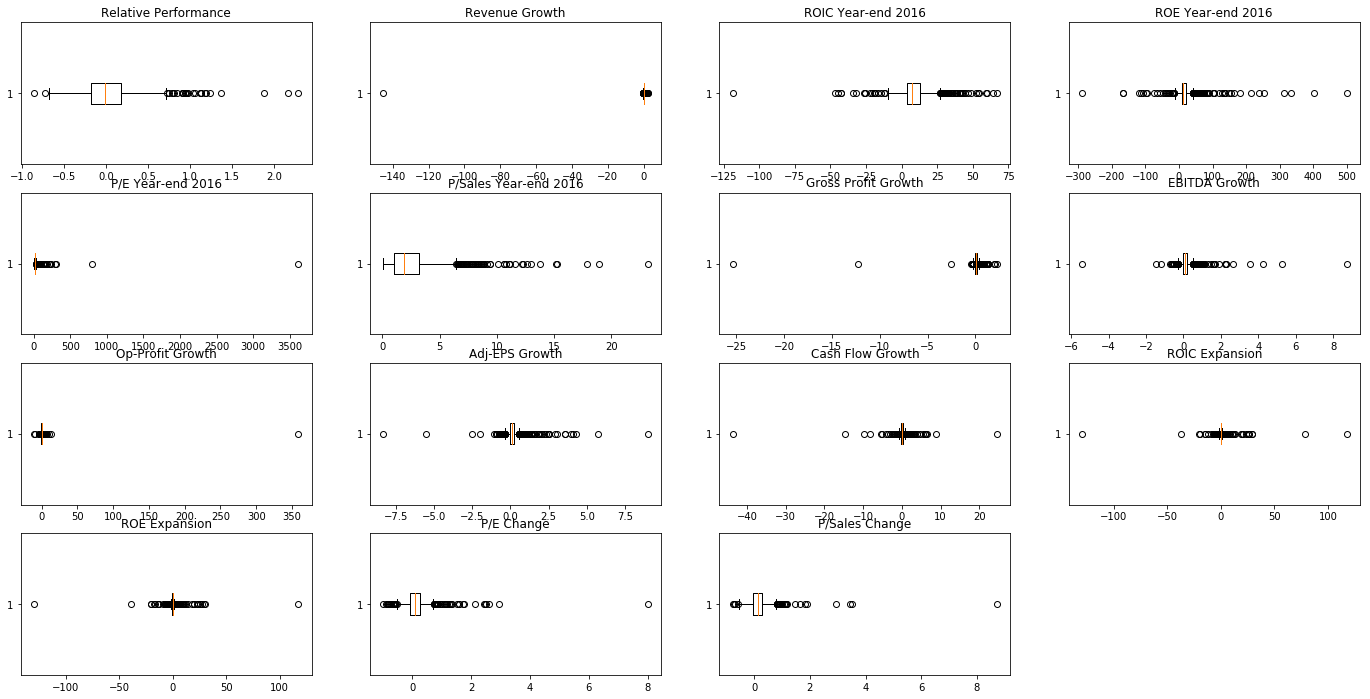

In [41]:
fig = plt.figure(figsize=(24,12))
ax1 = fig.add_subplot(4,4,1)
ax2 = fig.add_subplot(4,4,2)
ax3 = fig.add_subplot(4,4,3)
ax4 = fig.add_subplot(4,4,4)
ax5 = fig.add_subplot(4,4,5)
ax6 = fig.add_subplot(4,4,6)
ax7 = fig.add_subplot(4,4,7)
ax8 = fig.add_subplot(4,4,8)
ax9 = fig.add_subplot(4,4,9)
ax10 = fig.add_subplot(4,4,10)
ax11 = fig.add_subplot(4,4,11)
ax12 = fig.add_subplot(4,4,12)
ax13 = fig.add_subplot(4,4,13)
ax14 = fig.add_subplot(4,4,14)
ax15 = fig.add_subplot(4,4,15)
ax1.boxplot(Stocks_1617.Rel_Perf_1617, vert=False), ax1.set_title('Relative Performance')
ax2.boxplot(Stocks_1617.Rev_1617, vert=False), ax2.set_title('Revenue Growth')
ax3.boxplot(Stocks_1617.ROIC_16, vert=False), ax3.set_title('ROIC Year-end 2016')
ax4.boxplot(Stocks_1617.ROE_16, vert=False), ax4.set_title('ROE Year-end 2016')
ax5.boxplot(Stocks_1617.PE_16, vert=False), ax5.set_title('P/E Year-end 2016')
ax6.boxplot(Stocks_1617.PS_16, vert=False), ax6.set_title('P/Sales Year-end 2016')
ax7.boxplot(Stocks_1617.GP_1617, vert=False), ax7.set_title('Gross Profit Growth')
ax8.boxplot(Stocks_1617.EBITDA_1617, vert=False), ax8.set_title('EBITDA Growth')
ax9.boxplot(Stocks_1617.OP_1617, vert=False), ax9.set_title('Op-Profit Growth')
ax10.boxplot(Stocks_1617.aEPS_1617, vert=False), ax10.set_title('Adj-EPS Growth')
ax11.boxplot(Stocks_1617.CFO_1617, vert=False), ax11.set_title('Cash Flow Growth')
ax12.boxplot(Stocks_1617.ROIX_1617, vert=False), ax12.set_title('ROIC Expansion')
ax13.boxplot(Stocks_1617.ROEX_1617, vert=False), ax13.set_title('ROE Expansion')
ax14.boxplot(Stocks_1617.PEX_1617, vert=False), ax14.set_title('P/E Change')
ax15.boxplot(Stocks_1617.PSX_1617, vert=False), ax15.set_title('P/Sales Change');

In [42]:
Stocks_clean = Stocks_1617[np.abs(Stocks_1617.Rel_Perf_1617-Stocks_1617.Rel_Perf_1617.mean())<=(1*Stocks_1617.Rel_Perf_1617.std())]
Stocks_clean = Stocks_1617[np.abs(Stocks_1617.Rev_1617-Stocks_1617.Rev_1617.mean())<=(1*Stocks_1617.Rev_1617.std())]
Stocks_clean = Stocks_1617[np.abs(Stocks_1617.ROIC_16-Stocks_1617.ROIC_16.mean())<=(1*Stocks_1617.ROIC_16.std())]
Stocks_clean = Stocks_1617[np.abs(Stocks_1617.ROE_16-Stocks_1617.ROE_16.mean())<=(1*Stocks_1617.ROE_16.std())]
Stocks_clean = Stocks_1617[np.abs(Stocks_1617.PE_16-Stocks_1617.PE_16.mean())<=(1*Stocks_1617.PE_16.std())]
Stocks_clean = Stocks_1617[np.abs(Stocks_1617.PS_16-Stocks_1617.PS_16.mean())<=(1*Stocks_1617.PS_16.std())]
Stocks_clean = Stocks_1617[np.abs(Stocks_1617.GP_1617-Stocks_1617.GP_1617.mean())<=(1*Stocks_1617.GP_1617.std())]
Stocks_clean = Stocks_1617[np.abs(Stocks_1617.EBITDA_1617-Stocks_1617.EBITDA_1617.mean())<=(1*Stocks_1617.EBITDA_1617.std())]
Stocks_clean = Stocks_1617[np.abs(Stocks_1617.OP_1617-Stocks_1617.OP_1617.mean())<=(1*Stocks_1617.OP_1617.std())]
Stocks_clean = Stocks_1617[np.abs(Stocks_1617.aEPS_1617-Stocks_1617.aEPS_1617.mean())<=(1*Stocks_1617.aEPS_1617.std())]
Stocks_clean = Stocks_1617[np.abs(Stocks_1617.CFO_1617-Stocks_1617.CFO_1617.mean())<=(1*Stocks_1617.CFO_1617.std())]
Stocks_clean = Stocks_1617[np.abs(Stocks_1617.ROIX_1617-Stocks_1617.ROIX_1617.mean())<=(1*Stocks_1617.ROIX_1617.std())]
Stocks_clean = Stocks_1617[np.abs(Stocks_1617.ROEX_1617-Stocks_1617.ROEX_1617.mean())<=(1*Stocks_1617.ROEX_1617.std())]
Stocks_clean = Stocks_1617[np.abs(Stocks_1617.PEX_1617-Stocks_1617.PEX_1617.mean())<=(1*Stocks_1617.PEX_1617.std())]
Stocks_clean = Stocks_1617[np.abs(Stocks_1617.PSX_1617-Stocks_1617.PSX_1617.mean())<=(1*Stocks_1617.PSX_1617.std())];

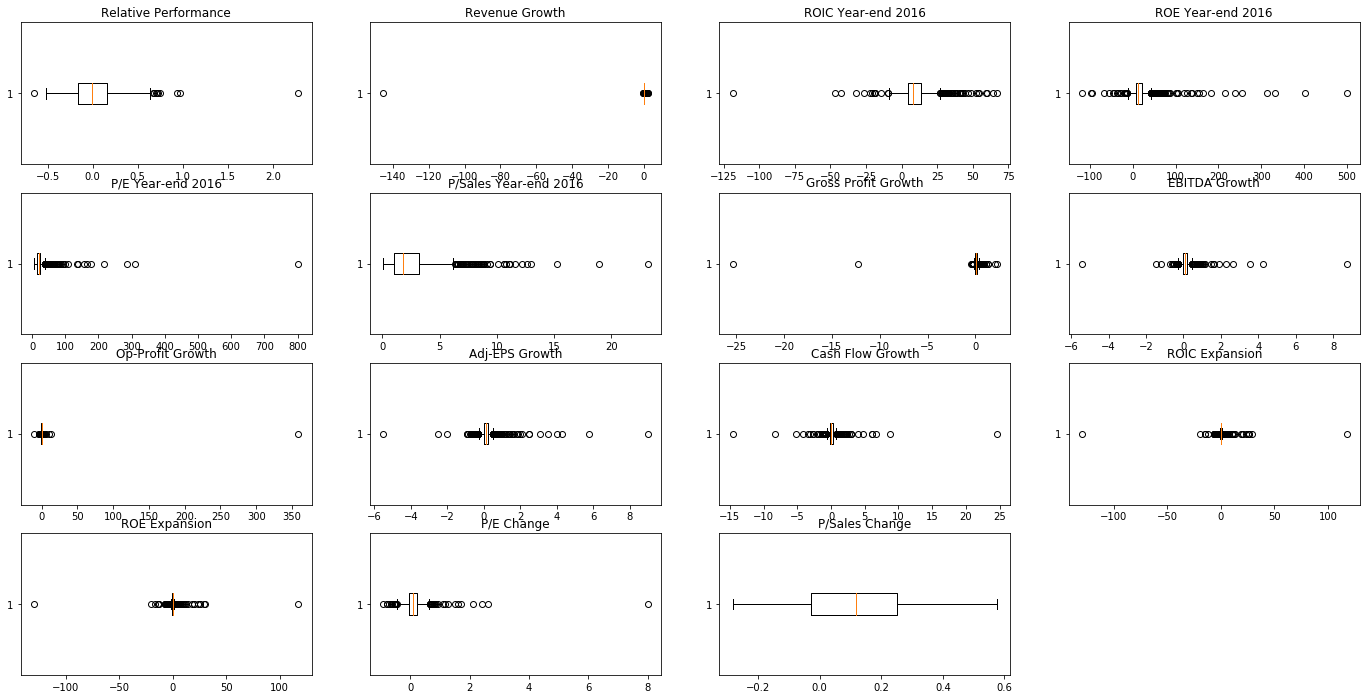

In [43]:
fig = plt.figure(figsize=(24,12))
ax1 = fig.add_subplot(4,4,1)
ax2 = fig.add_subplot(4,4,2)
ax3 = fig.add_subplot(4,4,3)
ax4 = fig.add_subplot(4,4,4)
ax5 = fig.add_subplot(4,4,5)
ax6 = fig.add_subplot(4,4,6)
ax7 = fig.add_subplot(4,4,7)
ax8 = fig.add_subplot(4,4,8)
ax9 = fig.add_subplot(4,4,9)
ax10 = fig.add_subplot(4,4,10)
ax11 = fig.add_subplot(4,4,11)
ax12 = fig.add_subplot(4,4,12)
ax13 = fig.add_subplot(4,4,13)
ax14 = fig.add_subplot(4,4,14)
ax15 = fig.add_subplot(4,4,15)
ax1.boxplot(Stocks_clean.Rel_Perf_1617, vert=False), ax1.set_title('Relative Performance')
ax2.boxplot(Stocks_clean.Rev_1617, vert=False), ax2.set_title('Revenue Growth')
ax3.boxplot(Stocks_clean.ROIC_16, vert=False), ax3.set_title('ROIC Year-end 2016')
ax4.boxplot(Stocks_clean.ROE_16, vert=False), ax4.set_title('ROE Year-end 2016')
ax5.boxplot(Stocks_clean.PE_16, vert=False), ax5.set_title('P/E Year-end 2016')
ax6.boxplot(Stocks_clean.PS_16, vert=False), ax6.set_title('P/Sales Year-end 2016')
ax7.boxplot(Stocks_clean.GP_1617, vert=False), ax7.set_title('Gross Profit Growth')
ax8.boxplot(Stocks_clean.EBITDA_1617, vert=False), ax8.set_title('EBITDA Growth')
ax9.boxplot(Stocks_clean.OP_1617, vert=False), ax9.set_title('Op-Profit Growth')
ax10.boxplot(Stocks_clean.aEPS_1617, vert=False), ax10.set_title('Adj-EPS Growth')
ax11.boxplot(Stocks_clean.CFO_1617, vert=False), ax11.set_title('Cash Flow Growth')
ax12.boxplot(Stocks_clean.ROIX_1617, vert=False), ax12.set_title('ROIC Expansion')
ax13.boxplot(Stocks_clean.ROEX_1617, vert=False), ax13.set_title('ROE Expansion')
ax14.boxplot(Stocks_clean.PEX_1617, vert=False), ax14.set_title('P/E Change')
ax15.boxplot(Stocks_clean.PSX_1617, vert=False), ax15.set_title('P/Sales Change');

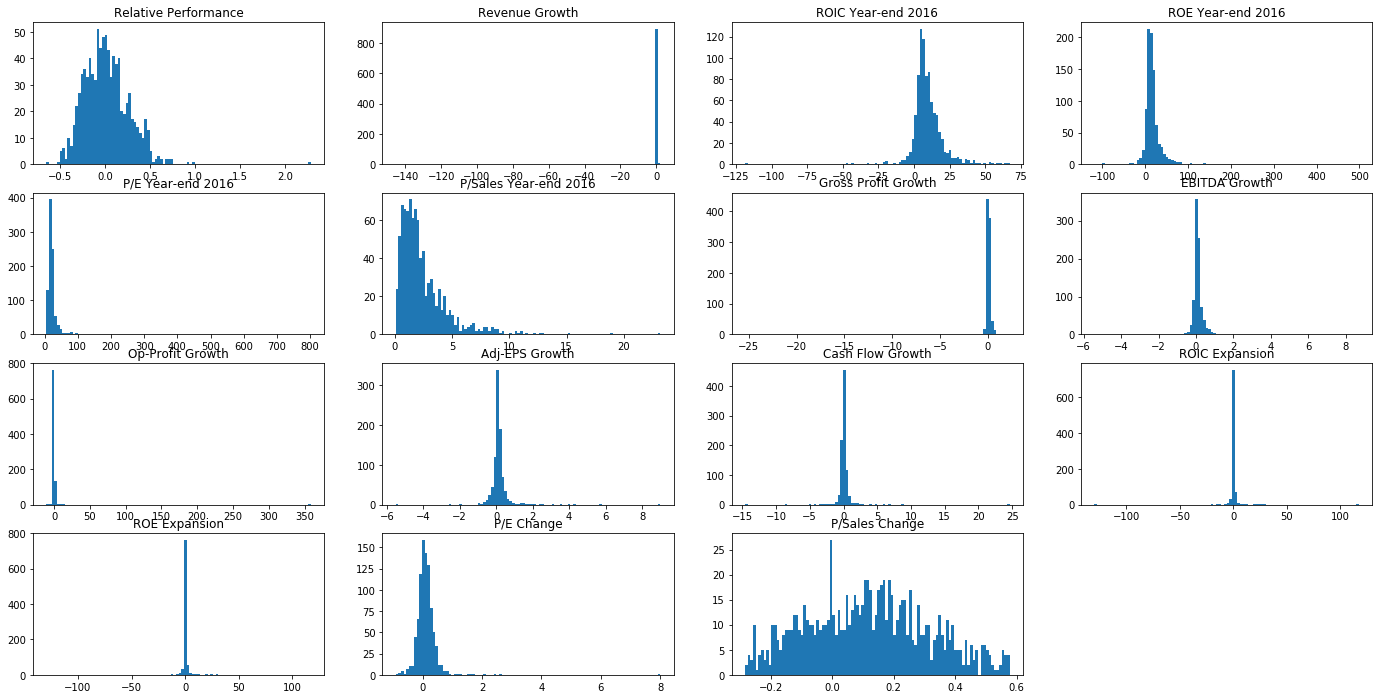

In [44]:
#Stocks_clean.hist(column='Rel_Perf_1617', bins=100)
fig = plt.figure(figsize=(24,12))
ax1 = fig.add_subplot(4,4,1)
ax2 = fig.add_subplot(4,4,2)
ax3 = fig.add_subplot(4,4,3)
ax4 = fig.add_subplot(4,4,4)
ax5 = fig.add_subplot(4,4,5)
ax6 = fig.add_subplot(4,4,6)
ax7 = fig.add_subplot(4,4,7)
ax8 = fig.add_subplot(4,4,8)
ax9 = fig.add_subplot(4,4,9)
ax10 = fig.add_subplot(4,4,10)
ax11 = fig.add_subplot(4,4,11)
ax12 = fig.add_subplot(4,4,12)
ax13 = fig.add_subplot(4,4,13)
ax14 = fig.add_subplot(4,4,14)
ax15 = fig.add_subplot(4,4,15)
ax1.hist(Stocks_clean.Rel_Perf_1617, bins=100), ax1.set_title('Relative Performance')
ax2.hist(Stocks_clean.Rev_1617, bins=100), ax2.set_title('Revenue Growth')
ax3.hist(Stocks_clean.ROIC_16, bins=100), ax3.set_title('ROIC Year-end 2016')
ax4.hist(Stocks_clean.ROE_16, bins=100), ax4.set_title('ROE Year-end 2016')
ax5.hist(Stocks_clean.PE_16, bins=100), ax5.set_title('P/E Year-end 2016')
ax6.hist(Stocks_clean.PS_16, bins=100), ax6.set_title('P/Sales Year-end 2016')
ax7.hist(Stocks_clean.GP_1617, bins=100), ax7.set_title('Gross Profit Growth')
ax8.hist(Stocks_clean.EBITDA_1617, bins=100), ax8.set_title('EBITDA Growth')
ax9.hist(Stocks_clean.OP_1617, bins=100), ax9.set_title('Op-Profit Growth')
ax10.hist(Stocks_clean.aEPS_1617, bins=100), ax10.set_title('Adj-EPS Growth')
ax11.hist(Stocks_clean.CFO_1617, bins=100), ax11.set_title('Cash Flow Growth')
ax12.hist(Stocks_clean.ROIX_1617, bins=100), ax12.set_title('ROIC Expansion')
ax13.hist(Stocks_clean.ROEX_1617, bins=100), ax13.set_title('ROE Expansion')
ax14.hist(Stocks_clean.PEX_1617, bins=100), ax14.set_title('P/E Change')
ax15.hist(Stocks_clean.PSX_1617, bins=100), ax15.set_title('P/Sales Change');

#### Our final step prior to fitting our linear regression model is to create and examine a correlation matrix containing our potential independent variables and our target variable.  Such a correlation matrix will inform us of at least two important items:
- Features with the highest correlations with our target => these features will be considered for use in our model
- Correlations between our independent variables (autocorrelations/collinearity).  High correlation between our independent variables is not desireable; adding autocorrelated features to our model adds no value 

In [45]:
Stocks_corr = Stocks_clean.corr()
Stocks_corr

,Rel_Perf_1617,ROIC_16,ROE_16,PE_16,PS_16,Rev_1617,GP_1617,EBITDA_1617,OP_1617,aEPS_1617,CFO_1617,ROIX_1617,ROEX_1617,PEX_1617,PSX_1617
Rel_Perf_1617,1.000000,0.034869,-0.029587,0.025735,0.110587,0.022443,0.083371,0.193953,-0.031370,0.229468,0.198404,-0.026373,-0.022103,0.211101,0.811279
ROIC_16,0.034869,1.000000,0.560303,-0.139065,0.084448,0.016367,0.030070,-0.016989,-0.044285,-0.059383,-0.011283,-0.031431,-0.031555,0.013907,-0.005666
ROE_16,-0.029587,0.560303,1.000000,-0.089124,0.014965,0.009590,0.010184,-0.025129,-0.030529,-0.044374,-0.011563,-0.016416,-0.018169,-0.013761,-0.028323
PE_16,0.025735,-0.139065,-0.089124,1.000000,0.192665,0.020194,-0.073564,0.036574,-0.014634,0.501423,0.019270,-0.010853,-0.011516,-0.130626,-0.039567
PS_16,0.110587,0.084448,0.014965,0.192665,1.000000,-0.028347,-0.056345,0.062054,0.002839,0.047379,0.039890,0.015789,0.013675,0.013054,0.041171
Rev_1617,0.022443,0.016367,0.009590,0.020194,-0.028347,1.000000,0.884160,-0.005681,0.000207,0.015063,0.010532,-0.000886,-0.000398,0.004486,-0.009181
GP_1617,0.083371,0.030070,0.010184,-0.073564,-0.056345,0.884160,1.000000,0.103390,-0.004599,0.022100,0.041109,-0.004267,-0.004124,-0.005911,0.031593
EBITDA_1617,0.193953,-0.016989,-0.025129,0.036574,0.062054,-0.005681,0.103390,1.000000,-0.120345,0.105826,0.157786,-0.067078,-0.071980,-0.281347,0.057220
OP_1617,-0.031370,-0.044285,-0.030529,-0.014634,0.002839,0.000207,-0.004599,-0.120345,1.000000,-0.015782,-0.006744,0.009448,0.012066,0.042380,-0.030730
aEPS_1617,0.229468,-0.059383,-0.044374,0.501423,0.047379,0.015063,0.022100,0.105826,-0.015782,1.000000,0.079149,-0.042301,-0.043107,-0.266588,0.058381


#### The correlation matrix, above, tells us several things:
- The features with the highest correlation to Rel_Perf_1617 are EBITDA_1617 (0.206), aEPS (0.254), CFO_1617 (0.169), PEX_1617 (0.299), and PSX_1617 (0.852); 
- The highest correlation between these five features (autocorrelation/collinearity) exists between PEX_1617 and PSX_1617 (0.406).  This is an encouraging result in that we can be comfortable using all five in our model. 

### We will now begin our linear regression model fitting.
- First, we split the data into training and test sets via "train-test-split".
- Then will fit our linear regression models with the training set and evaluate our models' performance.

In [51]:
# Instantiate and fit linear regression model
lr = LinearRegression()
X = Stocks_clean[['EBITDA_1617', 'aEPS_1617', 'CFO_1617', 'PEX_1617', 'PSX_1617']]
y = Stocks_clean.Rel_Perf_1617

# # Train-Test-Split
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [52]:
lr.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [53]:
# Predict stock performance on test data
Stocks_predict = lr.predict(X_test)

In [54]:
# evaluate performance based on the root-mean-squared-error (= sq-rt of men-squared-error)
np.sqrt(mean_squared_error(y_test, Stocks_predict))

0.15156942024708808

### An Interesting Test => our LR Model Predicting Stock Performance vs "The Little Book That Beat the Market" 
- The basic premise of Joel Greenblatt's book, "The Little Book That Beat the Market", says that in order to beat the market, investors should buy stocks with high ROE's and low-P/E's.
- We will test this premise versus our model! 

In [59]:
# Instantiate and fit linear regression model
lr = LinearRegression()
X = Stocks_clean[['ROE_16', 'PE_16']]
y = Stocks_clean.Rel_Perf_1617

# # Train-Test-Split
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [60]:
lr.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [61]:
# Predict stock performance on test data
Stocks_predict = lr.predict(X_test)

In [62]:
# evaluate performance based on the root-mean-squared-error (= sq-rt of men-squared-error)
np.sqrt(mean_squared_error(y_test, Stocks_predict))

0.2274221584654436